Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [9]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

In [27]:
df_btc_price

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,2.105680e+07
1,2014-09-18,424.440002,3.448320e+07
2,2014-09-19,394.795990,3.791970e+07
3,2014-09-20,408.903992,3.686360e+07
4,2014-09-21,398.821014,2.658010e+07
...,...,...,...
2199,2020-09-24,10745.548828,2.301754e+10
2200,2020-09-25,10702.290039,2.123255e+10
2201,2020-09-26,10754.437500,1.810501e+10
2202,2020-09-27,10774.426758,1.801688e+10


# Data Exploration

### Tesla

In [49]:
df_tesla.shape
df_tesla.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

In [131]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [51]:
print(f'Largest value for Tesla in Web Search: {df_tesla.max()}')
print(f'Smallest value for Tesla in Web Search:{df_tesla.min()} ')

Largest value for Tesla in Web Search: MONTH              2020-09-01
TSLA_WEB_SEARCH            31
TSLA_USD_CLOSE     498.320007
dtype: object
Smallest value for Tesla in Web Search:MONTH              2010-06-01
TSLA_WEB_SEARCH             2
TSLA_USD_CLOSE          3.896
dtype: object 


In [53]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


### Unemployment Data

In [63]:
print(df_unemployment.shape)
df_unemployment.head()

(181, 3)


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [65]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search:{df_unemployment.UE_BENEFITS_WEB_SEARCH.max()} ')

Largest value for "Unemployemnt Benefits" in Web Search:100 


In [67]:
df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


### Bitcoin

In [71]:
print(df_btc_price.shape)
print(df_btc_search.shape)

(2204, 3)
(73, 2)


In [73]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [75]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [77]:
print(f'largest BTC News Search: {df_btc_search.BTC_NEWS_SEARCH.max()} ')

largest BTC News Search: 100 


# Data Cleaning

### Check for Missing Values

In [101]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [107]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()} ')

Missing values for BTC price?: True 


In [5]:
print(f'Number of missing values: ')

Number of missing values: 


In [115]:
df_btc_price.dropna(inplace=True)

In [117]:
df_btc_price.shape

(2203, 3)

### Convert Strings to DateTime Objects

In [119]:
df_btc_price.dtypes

DATE       object
CLOSE     float64
VOLUME    float64
dtype: object

In [121]:
df_btc_search.dtypes

MONTH              object
BTC_NEWS_SEARCH     int64
dtype: object

In [123]:
df_tesla.dtypes

MONTH               object
TSLA_WEB_SEARCH      int64
TSLA_USD_CLOSE     float64
dtype: object

In [125]:
df_unemployment.dtypes

MONTH                      object
UE_BENEFITS_WEB_SEARCH      int64
UNRATE                    float64
dtype: object

In [127]:
df_btc_price.DATE= pd.to_datetime(df_btc_price.DATE)

In [129]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [133]:
df_btc_price.dtypes

DATE      datetime64[ns]
CLOSE            float64
VOLUME           float64
dtype: object

In [135]:
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)

In [137]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09-01,5
1,2014-10-01,4
2,2014-11-01,4
3,2014-12-01,4
4,2015-01-01,5


In [139]:
df_btc_search.dtypes

MONTH              datetime64[ns]
BTC_NEWS_SEARCH             int64
dtype: object

In [141]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)

In [143]:
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)

In [145]:
df_tesla.dtypes

MONTH              datetime64[ns]
TSLA_WEB_SEARCH             int64
TSLA_USD_CLOSE            float64
dtype: object

In [147]:
df_unemployment.dtypes

MONTH                     datetime64[ns]
UE_BENEFITS_WEB_SEARCH             int64
UNRATE                           float64
dtype: object

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [153]:
df_btc_price_monthly = df_btc_price.resample("ME", on="DATE").last()

In [155]:
df_btc_price_monthly

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,3.470730e+07
2014-10-31,338.321014,1.254540e+07
2014-11-30,378.046997,9.194440e+06
2014-12-31,320.192993,1.394290e+07
2015-01-31,217.464005,2.334820e+07
...,...,...
2020-05-31,9461.058594,2.777329e+10
2020-06-30,9137.993164,1.573580e+10
2020-07-31,11323.466797,2.316047e+10


# Data Visualisation

### Tesla Stock Price v.s. Search Volume

In [364]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
year_format = mdates.DateFormatter("%Y")

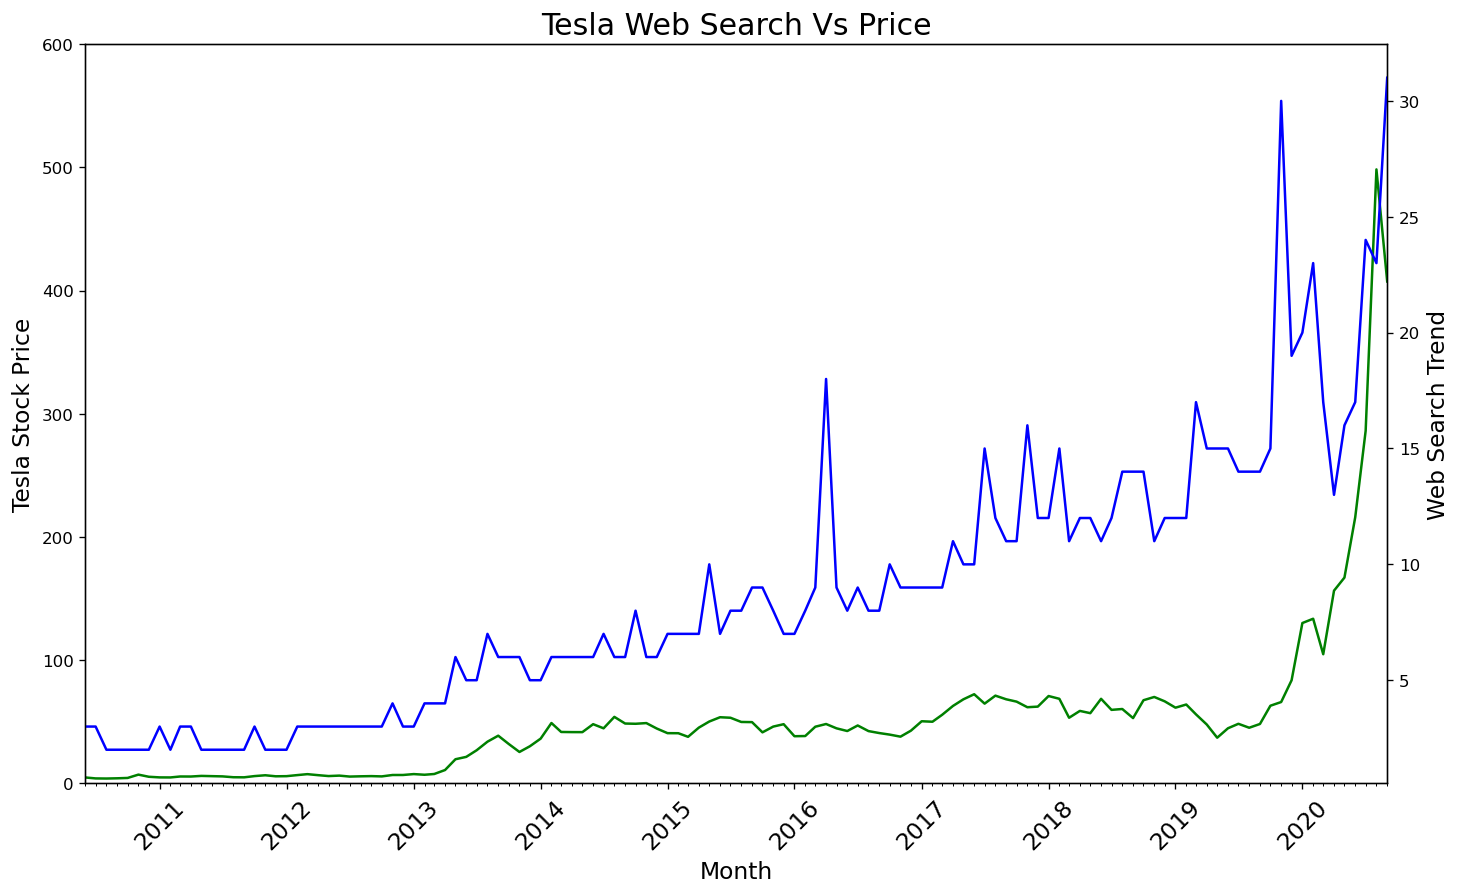

In [370]:
plt.figure(figsize=(14,8), dpi=120)
plt.title("Tesla Web Search Vs Price", fontsize=18)
plt.xticks(fontsize=14,rotation=45)
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_tesla.MONTH,df_tesla.TSLA_USD_CLOSE, color= "green")
ax2.plot( df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH,color= "blue")

ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

ax1.set_xlabel("Month", fontsize=14)
ax1.set_ylabel("Tesla Stock Price", fontsize=14)
ax2.set_ylabel("Web Search Trend", fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(year_format)
ax1.xaxis.set_minor_locator(months)

plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

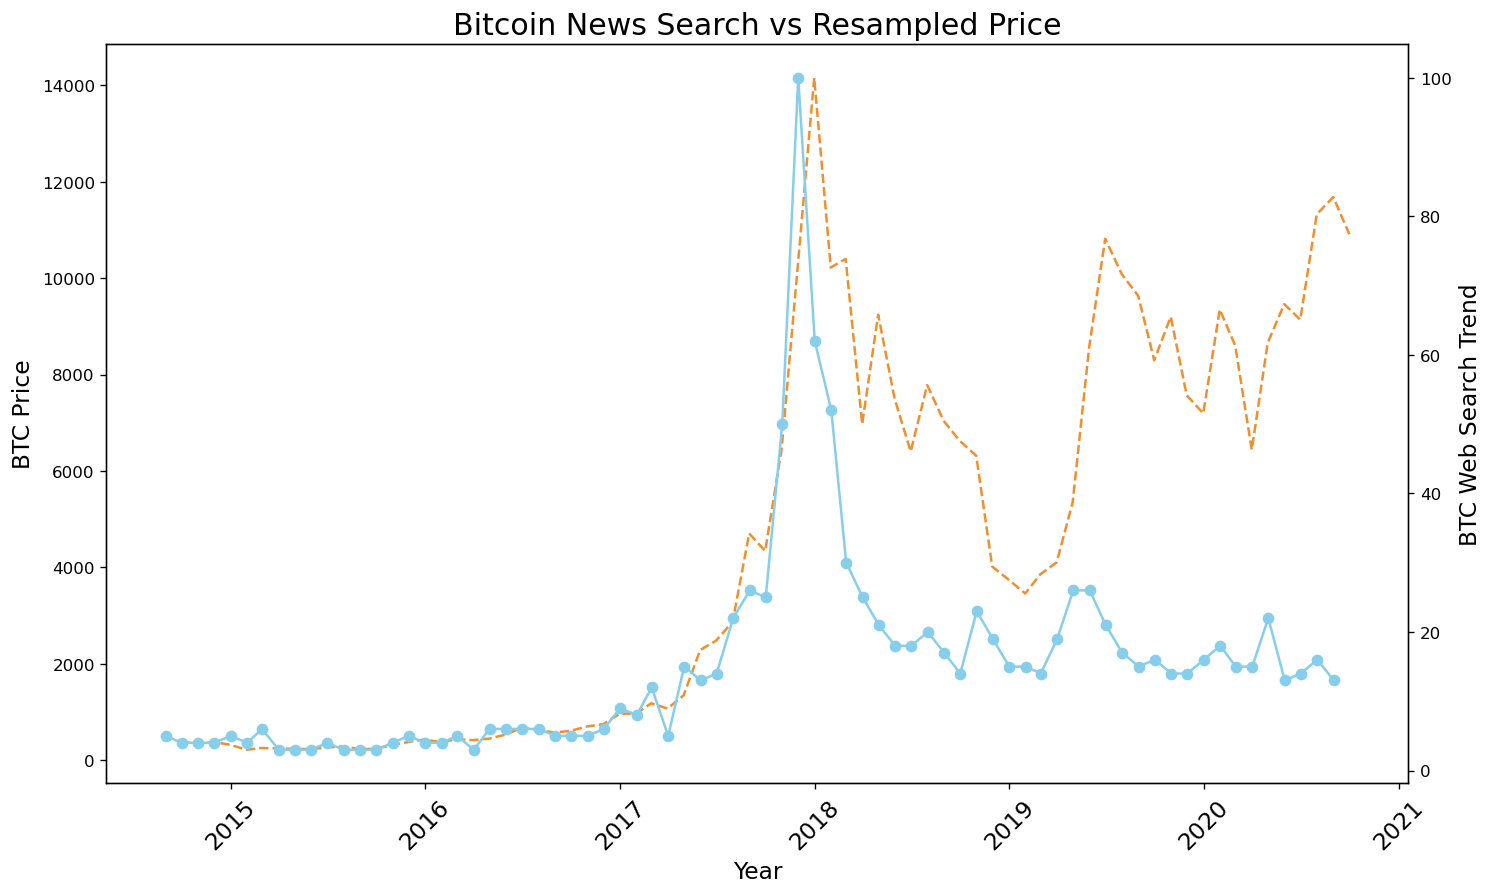

In [272]:
plt.figure(figsize=(14,8), dpi=120)
plt.title("Bitcoin News Search vs Resampled Price", fontsize=18)
plt.xticks(fontsize=14,rotation=45)
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_btc_price_monthly.index,df_btc_price_monthly.CLOSE , "--",color= "#F08F2E")
ax2.plot( df_btc_search.MONTH, df_btc_search.BTC_NEWS_SEARCH,marker="o",color= "skyblue")

ax1.set_xlabel("Year", fontsize=14)
ax1.set_ylabel("BTC Price", fontsize=14)
ax2.set_ylabel("BTC Web Search Trend", fontsize=14)


plt.show()

In [274]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.7
1,2004-02-01,33,5.6
2,2004-03-01,25,5.8
3,2004-04-01,29,5.6
4,2004-05-01,23,5.6


### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

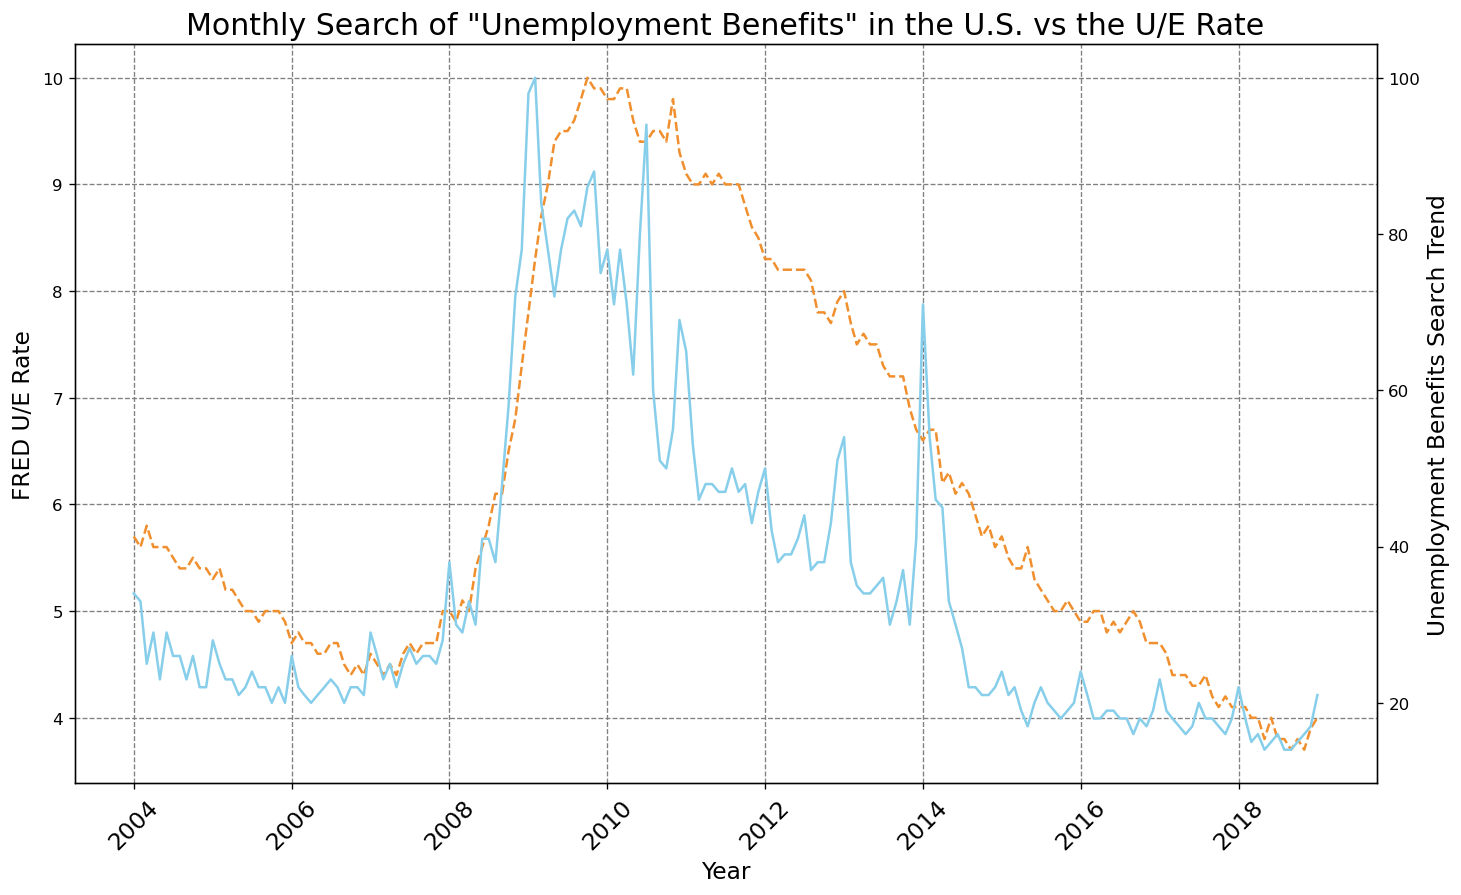

In [298]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.xticks(fontsize=14,rotation=45)
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.grid(color="grey", linestyle="--")

ax1.plot(df_unemployment.MONTH,df_unemployment.UNRATE,color= "#F08F2E", linestyle="--")
ax2.plot(df_unemployment.MONTH,df_unemployment.UE_BENEFITS_WEB_SEARCH,color= "skyblue")


ax1.set_xlabel("Year", fontsize=14)
ax2.set_ylabel("Unemployment Benefits Search Trend", fontsize=14)
ax1.set_ylabel("FRED U/E Rate", fontsize=14)




plt.show()

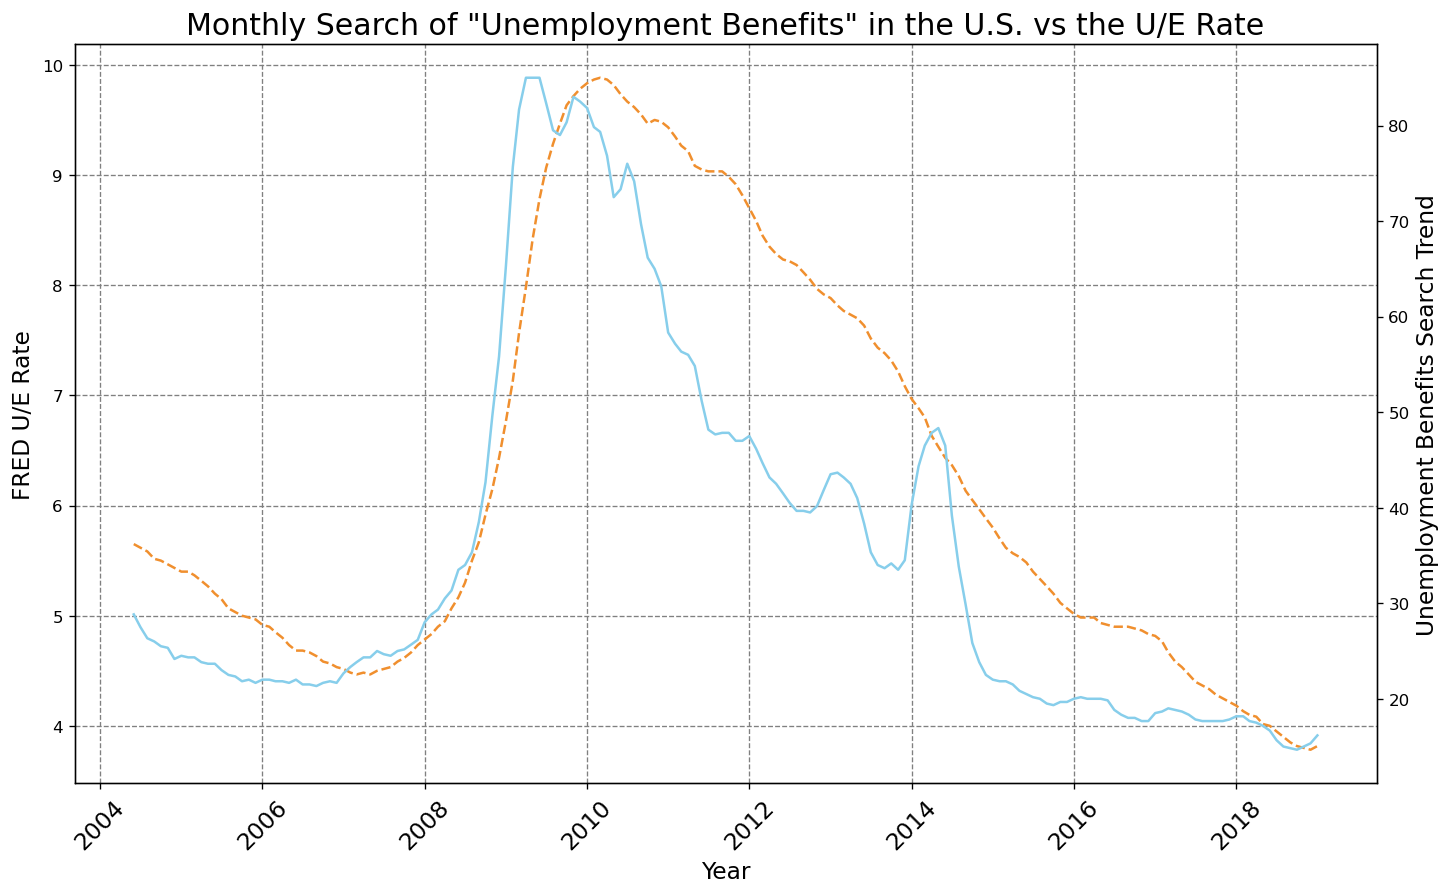

In [322]:
df_rolling_six_month = df_unemployment[["UE_BENEFITS_WEB_SEARCH", "UNRATE"]].rolling(window=6).mean()

plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.xticks(fontsize=14,rotation=45)
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.grid(color="grey", linestyle="--")

ax1.plot(df_unemployment.MONTH,df_rolling_six_month.UNRATE,color= "#F08F2E", linestyle="--")
ax2.plot(df_unemployment.MONTH,df_rolling_six_month.UE_BENEFITS_WEB_SEARCH,color= "skyblue")


ax1.set_xlabel("Year", fontsize=14)
ax2.set_ylabel("Unemployment Benefits Search Trend", fontsize=14)
ax1.set_ylabel("FRED U/E Rate", fontsize=14)




plt.show()

<h1>Including 2020 in Unemployment Charts</h1>

In [326]:
df_unemployment_2020 = pd.read_csv("UE Benefits Search vs UE Rate 2004-20.csv")
df_unemployment_2020.

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6


In [328]:
df_unemployment_2020.MONTH = pd.to_datetime(df_unemployment_2020.MONTH)

In [330]:
df_unemployment_2020.dtypes

MONTH                     datetime64[ns]
UE_BENEFITS_WEB_SEARCH             int64
UNRATE                           float64
dtype: object

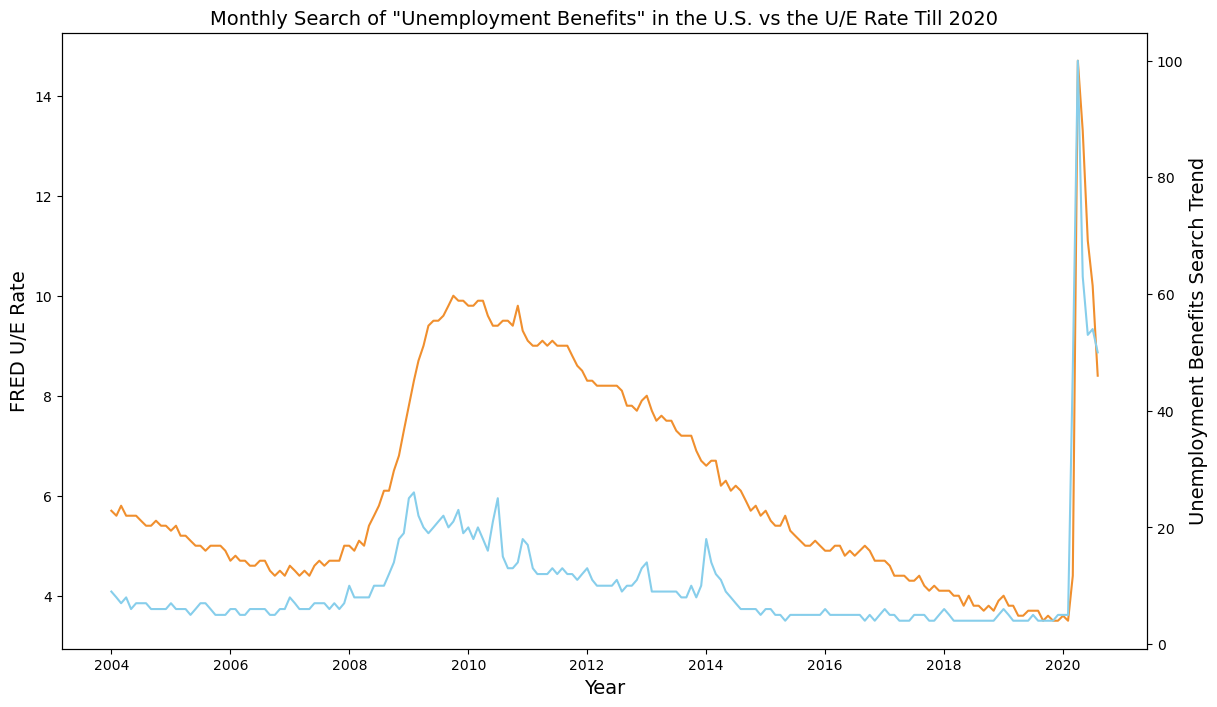

In [358]:
plt.figure(figsize=(14,8))
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate Till 2020', fontsize=14)
ax1= plt.gca()
ax2=ax1.twinx()


ax1.plot(df_unemployment_2020.MONTH, df_unemployment_2020.UNRATE, color="#F08F2E")
ax2.plot(df_unemployment_2020.MONTH, df_unemployment_2020.UE_BENEFITS_WEB_SEARCH, color="skyblue")

ax1.set_xlabel("Year", fontsize=14)
ax2.set_ylabel("Unemployment Benefits Search Trend", fontsize=14)
ax1.set_ylabel("FRED U/E Rate", fontsize=14)




plt.show()